In [5]:
import numpy as np
import matplotlib.pyplot as plt

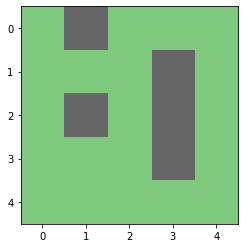

In [22]:
maze_list = [[0, 1, 0, 0, 0],
             [0, 0, 0, 1, 0],
             [0, 1, 0, 1, 0], 
             [0, 0, 0, 1, 0],
             [0, 0, 0, 0, 0]]
maze_arr = np.array(maze_list)
plt.imshow(maze_arr, cmap = 'Accent')

In [23]:
def array_to_graph(maze_arr):
    graph_dict = {}
    near_coords = []
    x, y = 0, 0
    for row in maze_arr:
        for column in row:
            if maze_arr[y, x] != 1:
                if y != 0 and maze_arr[y-1, x] != 1:
                    near_coords.append((x, y-1))
                if y != len(maze_arr)-1 and maze_arr[y+1, x] != 1:
                    near_coords.append((x, y+1))
                if x != 0 and maze_arr[y, x-1] != 1:
                    near_coords.append((x-1, y))
                if x != len(maze_arr[0])-1 and maze_arr[y, x+1] != 1: 
                    near_coords.append((x+1, y))
                graph_dict[(x, y)] = near_coords
                near_coords = []
            x += 1
        y += 1
        x = 0
    return graph_dict

In [24]:
array_to_graph(maze_arr)

{(0, 0): [(0, 1)],
 (2, 0): [(2, 1), (3, 0)],
 (3, 0): [(2, 0), (4, 0)],
 (4, 0): [(4, 1), (3, 0)],
 (0, 1): [(0, 0), (0, 2), (1, 1)],
 (1, 1): [(0, 1), (2, 1)],
 (2, 1): [(2, 0), (2, 2), (1, 1)],
 (4, 1): [(4, 0), (4, 2)],
 (0, 2): [(0, 1), (0, 3)],
 (2, 2): [(2, 1), (2, 3)],
 (4, 2): [(4, 1), (4, 3)],
 (0, 3): [(0, 2), (0, 4), (1, 3)],
 (1, 3): [(1, 4), (0, 3), (2, 3)],
 (2, 3): [(2, 2), (2, 4), (1, 3)],
 (4, 3): [(4, 2), (4, 4)],
 (0, 4): [(0, 3), (1, 4)],
 (1, 4): [(1, 3), (0, 4), (2, 4)],
 (2, 4): [(2, 3), (1, 4), (3, 4)],
 (3, 4): [(2, 4), (4, 4)],
 (4, 4): [(4, 3), (3, 4)]}

In [25]:
def maze_solver(maze_array):
    graph_dict = array_to_graph(maze_array)
    current_nodes = [(0, 0)]
    next_nodes = []
    path = []
    level_path = []
    while (len(maze_array[0]) -1, len(maze_array) - 1) not in current_nodes:
        next_nodes = []
        for node in current_nodes:
            path.append(node)
            for next_node in graph_dict[node]:
                if next_node not in path:
                    if next_node not in next_nodes:
                        next_nodes.append(next_node)
        current_nodes = next_nodes
        level_path.append(current_nodes)
    return level_path

In [26]:
def two_nodes_solver(maze_array, source_node, target_node):
    graph_dict = array_to_graph(maze_array)
    current_nodes = [source_node]
    next_nodes = []
    path = []
    level_path = []
    while (target_node) not in current_nodes:
        next_nodes = []
        for node in current_nodes:
            path.append(node)
            for next_node in graph_dict[node]:
                if next_node not in path:
                    if next_node not in next_nodes:
                        next_nodes.append(next_node)
        current_nodes = next_nodes
        level_path.append(current_nodes)
    return level_path

In [ ]:
maze